# TASK DESCREPTION

The 0/1 Knapsack Problem is a classic issue in combinatorial optimization. An adventurer is filling a knapsack with items from a loot, each with a weight and a value, but the knapsack can only hold a certain weight. The objective is to maximize the total value in the knapsack without exceeding its weight limit.

This task requires implementing a dynamic programming approach to solve the problem efficiently by breaking it down into simpler subproblems and storing their solutions. Additionally, a greedy algorithm will be implemented to contrast its heuristic approach with the optimized solution of dynamic programming. You will conduct a thorough analysis, comparing the solutions based on their value maximization and computational efficiency. Multiple test cases with varying numbers of items and knapsack capacities will be run to assess average, best, and worst-case performance metrics for each algorithm.

# greedy algorithm

In [1]:
def knapsack_greedy(capacity, weights, values):
    ratio = [(values[i] / weights[i], weights[i], values[i]) for i in range(len(weights))]
    ratio.sort(reverse=True, key=lambda x: x[0])
    total_value = 0
    current_capacity = 0

    for r in ratio:
        if current_capacity + r[1] <= capacity:
            current_capacity += r[1]
            total_value += r[2]

    return total_value

Why is the algorith above not "correct"?

even though it puts the object with the best value in the knapsack, it does not necessarily use the whole capacity of it, so the outcome does not always have the best value

In [2]:
print(knapsack_greedy(capacity=6, weights = [4, 3, 3], values =[5, 3, 3]))

5


Example:
capacity=6, weights = [4, 3, 3], values=[5, 3, 3] 

the greatest value here would be 6, but the algorithm could not use the whole capacity of the knapsack

# recursive algorithm

In [3]:
def knapsack_recursive(capacity, weights, values, n = None):
    if n is None:
        n = len(weights)
        
    #if there are no more items or no more space in the knapsack:
    if n == 0 or capacity == 0:
        return 0
    
    #if the item does not fit in the knapsack: 
    elif weights[n - 1] > capacity:
        #calls the function again but does not examine the last item
        return knapsack_recursive(capacity, weights, values, n - 1)

    #item fits in the knapsack: we either put it in or we don't
    else:
        no = knapsack_recursive(capacity, weights, values, n - 1)
        yes = values[n - 1] + knapsack_recursive(capacity - weights[n - 1], weights, values, n - 1)
        return max(yes, no)


#n = len(weights) <- number of items
#time = O(2**n) #slow for big numbers
#space = O(n) #does not take up a lot of memory (we like it, that's nice)

In [4]:
print(knapsack_recursive(capacity=6, weights = [4, 3, 3], values =[5, 3, 3]))
print(knapsack_recursive(capacity=6, weights = [], values =[]))
print(knapsack_recursive(capacity=6, weights = [4, 3, 3, 2, 2], values =[5, 3, 3, 22, 2]))
print(knapsack_recursive(capacity=100, weights = range(30), values =range(30))) #slow

6
0
27
100


# dynamic algorithm

In [5]:
def knapsack_dynamic(capacity, weights, values, n = None, memory = None):
    if n is None:
        n = len(weights)

    #table is made
    #None for every n and capacity 
    if memory is None:
        memory = [[None for _ in range(capacity + 1)] for _ in range(n + 1)] # +1 because range

    #if it was calculated before we do not do it again
    if memory[n][capacity] is not None:
        return memory[n][capacity]

    #if there are no more items or capacity in the knapsack, we cannot do anything anymore
    if n == 0 or capacity == 0:
        return 0
    
    #if an item does not fit in the knapsack then we do not put it in
    #check what fits form the other items
    elif weights[n - 1] > capacity:
        #save here
        #calls the function again but does not examine the last item
        memory[n][capacity] = knapsack_dynamic(capacity, weights, values, n - 1, memory)
        return memory[n][capacity]
    
    #item fits in the knapsack: we either put it in or we don't
    else:
        no = knapsack_dynamic(capacity, weights, values, n - 1, memory)
        yes = values[n - 1] + knapsack_dynamic(capacity - weights[n - 1], weights, values, n - 1, memory)
        memory[n][capacity] = max(yes, no)
        return memory[n][capacity]

#n = len(weights) <- number of items
#m = capacity
#time = O(n*m) we write every item in the table once max
#space = O(n*m) + O(n) table + n because traverse

In [6]:
print(knapsack_dynamic(capacity=6, weights = [4, 3, 3], values =[5, 3, 3]))
print(knapsack_dynamic(capacity=6, weights = [], values =[]))
print(knapsack_dynamic(capacity=6, weights = [4, 3, 3, 2, 2], values =[5, 3, 3, 22, 2]))
print(knapsack_dynamic(capacity=100, weights = range(30), values =range(30))) #slow

6
0
27
100


instead of calling the function recursively, we make a table
the rows are the items, the columns are the leftover capacity

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    |   |   |   |   |   |   |   |   |
| v=2, w=3 |   |   |   |   |   |   |   |   |
| v=2, w=1 |   |   |   |   |   |   |   |   |
| v=4, w=3 |   |   |   |   |   |   |   |   |
| v=5, w=4 |   |   |   |   |   |   |   |   |
| v=3, w=2 |   |   |   |   |   |   |   |   |

if the knapsack is empty, the value for every capacity is 0

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| v=2, w=3 |   |   |   |   |   |   |   |   |
| v=2, w=1 |   |   |   |   |   |   |   |   |
| v=4, w=3 |   |   |   |   |   |   |   |   |
| v=5, w=4 |   |   |   |   |   |   |   |   |
| v=3, w=2 |   |   |   |   |   |   |   |   |

if there is not enough capacity the item does not fit

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| v=2, w=3 | 0 | 0 | 0 |   |   |   |   |   |
| v=2, w=1 |   |   |   |   |   |   |   |   |
| v=4, w=3 |   |   |   |   |   |   |   |   |
| v=5, w=4 |   |   |   |   |   |   |   |   |
| v=3, w=2 |   |   |   |   |   |   |   |   |

if the item fits, there are 2 possibilities:
- we do not put it in, so the cell will be the same as the cell above it
- we put it in, so the cell will be what was in the previous row, but so many columns before as many the weight is plus the value of the current item 

from these two options we choose the bigger one

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| v=2, w=3 | 0 | 0 | 0 | 2 | 2 | 2 | 2 | 2 |
| v=2, w=1 |   |   |   |   |   |   |   |   |
| v=4, w=3 |   |   |   |   |   |   |   |   |
| v=5, w=4 |   |   |   |   |   |   |   |   |
| v=3, w=2 |   |   |   |   |   |   |   |   |

its the same for the second item. this way the filled out table shows the maximum value for the given capacity

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| v=2, w=3 | 0 | 0 | 0 | 2 | 2 | 2 | 2 | 2 |
| v=2, w=1 | 0 | 2 | 2 | 2 | 4 | 4 | 4 | 4 |
| v=4, w=3 |   |   |   |   |   |   |   |   |
| v=5, w=4 |   |   |   |   |   |   |   |   |
| v=3, w=2 |   |   |   |   |   |   |   |   |

..

|          | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|----------|---|---|---|---|---|---|---|---|
| empty    | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| v=2, w=3 | 0 | 0 | 0 | 2 | 2 | 2 | 2 | 2 |
| v=2, w=1 | 0 | 2 | 2 | 2 | 4 | 4 | 4 | 4 |
| v=4, w=3 | 0 | 2 | 2 | 4 | 6 | 6 | 6 | 8 |
| v=5, w=4 | 0 | 2 | 2 | 4 | 6 | 7 | 7 | 9 |
| v=3, w=2 | 0 | 0 | 3 | 5 | 6 | 7 | 9 | 10|

# bottom-up algorithm

In [7]:
def knapsack_bottom_up(capacity, weights, values):
    n = len(weights)

    K = [[0 for x in range(capacity + 1)] for x in range(n + 1)]

    for i in range(n + 1):
        for w in range(capacity + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif weights[i - 1] <= w:
                value_without_item = K[i - 1][w]
                value_with_item = values[i - 1] + K[i - 1][w - weights[i - 1]]
                K[i][w] = max(value_without_item, value_with_item)
            else:
                K[i][w] = K[i - 1][w]

    return K[n][capacity]

#n = number of items = len(weights)
#m = capacity
#calculate an n*m table
#time = O(n*m)
#memory needed is for the table
#space = O(n*m)

In [8]:
print(knapsack_bottom_up(capacity=50, weights=[], values=[]))
print(knapsack_bottom_up(capacity=50, weights=[10, 20, 30], values=[60, 100, 120]))
print(knapsack_bottom_up(capacity=10, weights=[1, 2, 4, 2, 5], values=[5, 3, 5, 3, 2]))

#runs quickly, and is not recursive
print(knapsack_bottom_up(capacity=100, weights=range(1, 31), values=range(1, 31)))
print(knapsack_bottom_up(capacity=100, weights=[10] * 30, values=range(1, 31)))

0
220
16
100
255


In [9]:
import time
import random

In [22]:
def knapsack_time(knapsack_function, create_data, times = 100):

    duration = 0
    for _ in range(times):
        capacity, weights, values = create_data()

        start = time.time()
        knapsack_function(capacity=capacity, weights=weights, values=values)
        duration += (time.time() - start) * 1000

    print(f"{knapsack_function.__name__} average duration: {duration} milliseconds")
    return duration

item_counts = range(10, 300, 10)
greedy_durations = []
recursive_durations = []
dynamic_durations = []
bottom_up_durations = []

for count in item_counts:
    print(f"Count: {count}")
    create_data = lambda : (count // 3, [random.randint(1, 100) for _ in range(count)], [random.randint(1, 100) for _ in range(count)])
    if count <= 100:
        recursive_durations.append(knapsack_time(knapsack_recursive, create_data))

    greedy_durations.append(knapsack_time(knapsack_greedy, create_data))
    dynamic_durations.append(knapsack_time(knapsack_dynamic, create_data))
    bottom_up_durations.append(knapsack_time(knapsack_bottom_up, create_data))

# some visual stuff here?????

Count: 10
knapsack_recursive average duration: 0.2765655517578125 milliseconds
knapsack_greedy average duration: 0.5218982696533203 milliseconds
knapsack_dynamic average duration: 0.9398460388183594 milliseconds
knapsack_bottom_up average duration: 1.30462646484375 milliseconds
Count: 20
knapsack_recursive average duration: 0.5352497100830078 milliseconds
knapsack_greedy average duration: 0.5838871002197266 milliseconds
knapsack_dynamic average duration: 1.3740062713623047 milliseconds
knapsack_bottom_up average duration: 1.9774436950683594 milliseconds
Count: 30
knapsack_recursive average duration: 0.8351802825927734 milliseconds
knapsack_greedy average duration: 0.4756450653076172 milliseconds
knapsack_dynamic average duration: 1.7261505126953125 milliseconds
knapsack_bottom_up average duration: 2.816438674926758 milliseconds
Count: 40
knapsack_recursive average duration: 1.3022422790527344 milliseconds
knapsack_greedy average duration: 0.5540847778320312 milliseconds
knapsack_dynami

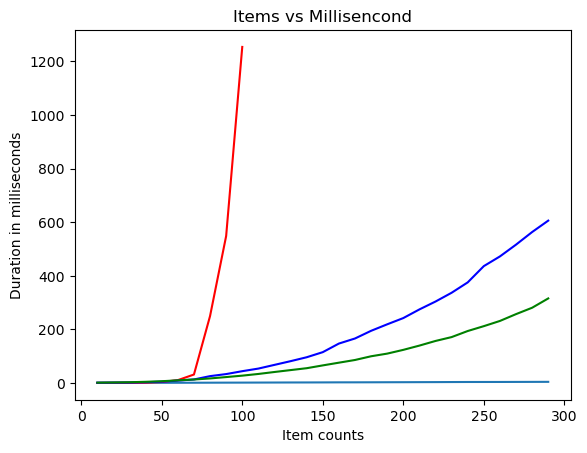

In [25]:
from numpy import *
import math
import matplotlib.pyplot as plt

plt.title("Items vs Millisencond")
plt.xlabel("Item counts")
plt.ylabel("Duration in milliseconds")
plt.plot(item_counts, greedy_durations)
plt.plot(item_counts[:len(recursive_durations)], recursive_durations, 'r')
plt.plot(item_counts, dynamic_durations, 'b')
plt.plot(item_counts, bottom_up_durations, 'g')
plt.show()